# Field plate's effect on peak field and IV performance
Importing the values from fieldpeak.tcl and plotting them in python for numerical analysis
___

In [116]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-darkgrid') # One of the two of these styles will work. not sure why it changes.
plt.style.use('seaborn-darkgrid')
print(plt.style.available)
import numpy as np

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Function for plotting from flooxs. I do not import the data optimally from flooxs but it is easy enough to clean so until I fix it this is how the function works

In [117]:
def plotFromFlooxs(IVfile, peakFile):
    
    Gate = []
    I = []
    
    with open(IVfile, 'r', encoding='utf-8') as file:
        for index, line in enumerate(file, start=1):
            value = line.strip()
            if index % 2 == 1:
                Gate.append(value)
            else:
                I.append(value)

    Gate = np.array([float(x) for x in Gate])
    I = np.array([float(x) for x in I])

    plt.figure(figsize=[14,7]);
    plt.subplot(1,2,1)
    plt.plot(Gate, I);
    plt.title("IV")
    plt.xlabel("$V_{G} (V)$");
    plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
    plt.grid(True);

    # =============================================
    #                 Peak Field
    # =============================================

    Vds = []
    peakField = []
        
    with open(peakFile, 'r', encoding='utf-8') as file:
        for index, line in enumerate(file, start=1):
            value = line.strip()
            if index % 2 == 1:
                Vds.append(value)
            else:
                peakField.append(value)

    Vds = np.array([float(x) for x in Vds])
    peakField = np.array([float(x) for x in peakField])

    plt.subplot(1,2,2);
    plt.plot(Vds, peakField);
    plt.title("Peak Field")
    plt.xlabel("$V_{DS} (V)$");
    plt.ylabel("Peak Field");
    plt.grid(True);

    return Gate, I, Vds, peakField

## IV curve and peak field for standard field plate location
Values (50nm in this case) are from the bottom of the field plate to the top of the T gate

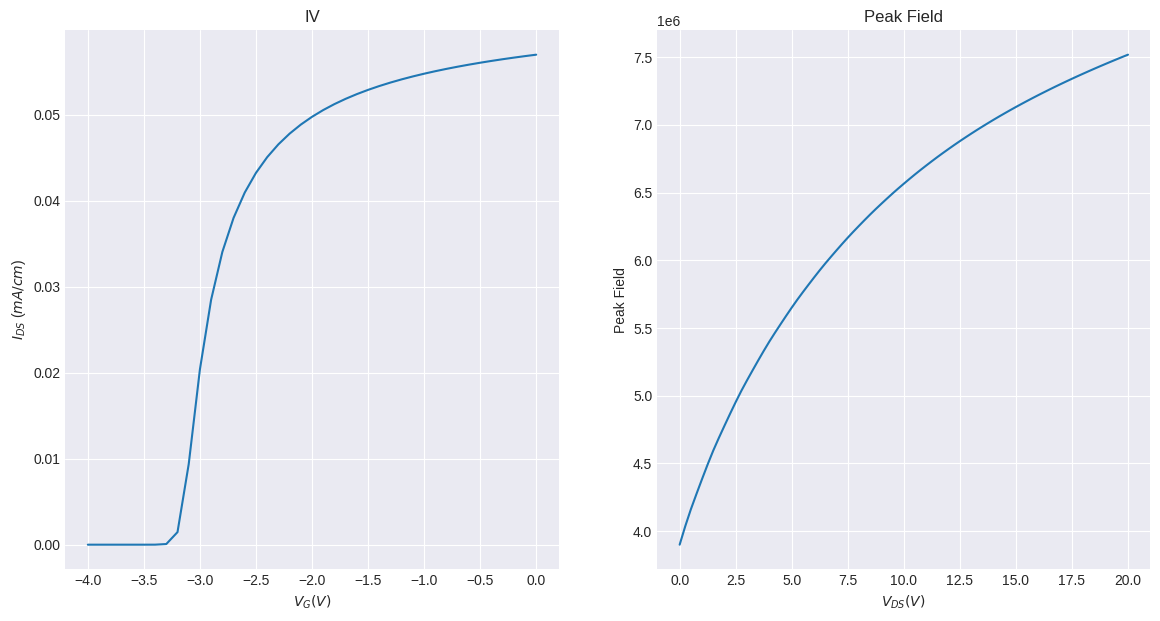

In [118]:
Gate, I_150nm, Vds, peakField_150nm = plotFromFlooxs("/home/ianstafford/flooxs/myFiles/fieldplate/IV_150nm.csv", "/home/ianstafford/flooxs/myFiles/fieldplate/peak_150nm.csv")

## IV curve and peak field for 100nm from bottom of field plate to top of T gate

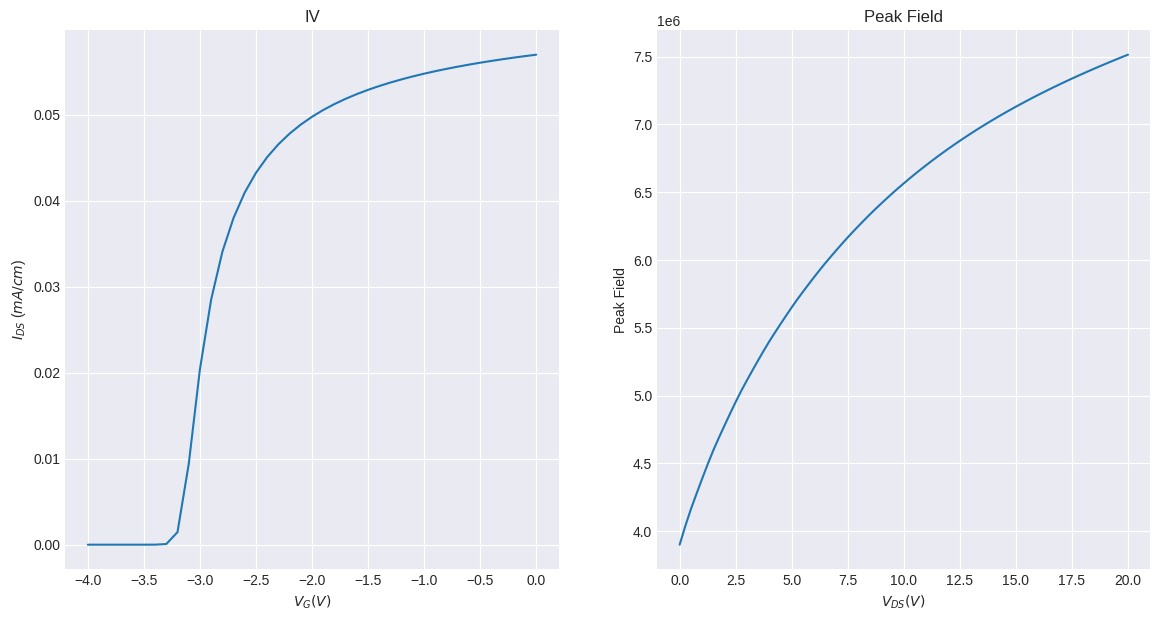

In [119]:
Gate, I_100nm, Vds, peakField_100nm = plotFromFlooxs("/home/ianstafford/flooxs/myFiles/fieldplate/IV_100nm.csv", "/home/ianstafford/flooxs/myFiles/fieldplate/peak_100nm.csv")

## IV curve and peak field for 50nm from bottom of field plate to top of T gate

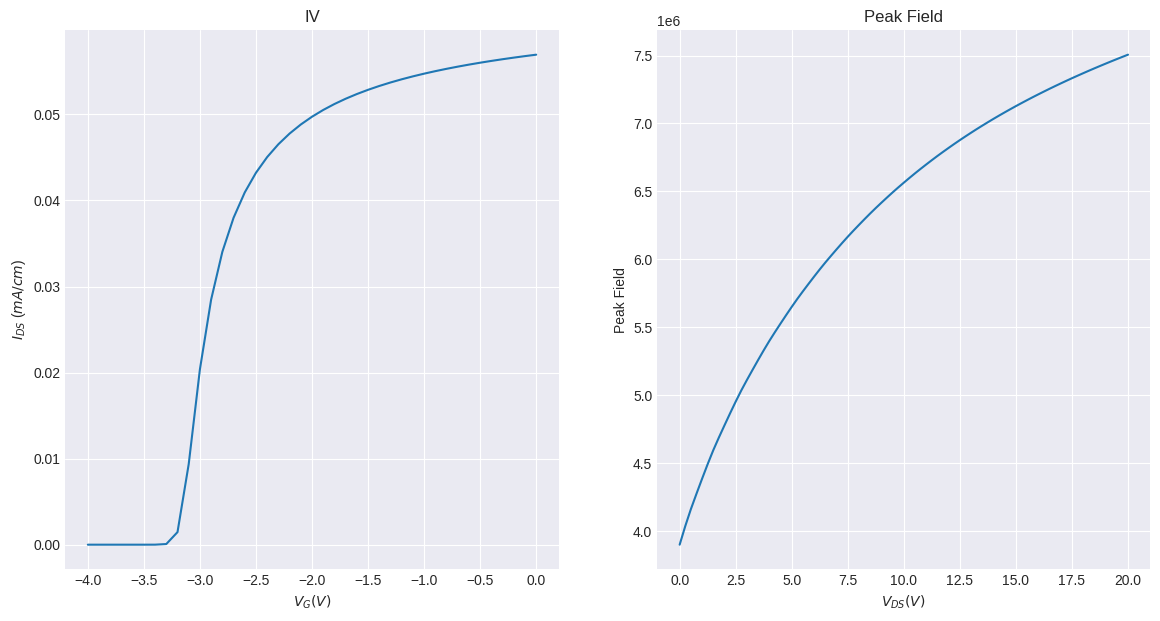

In [120]:
Gate, I_50nm, Vds, peakField_50nm = plotFromFlooxs("/home/ianstafford/flooxs/myFiles/fieldplate/IV_50nm.csv", "/home/ianstafford/flooxs/myFiles/fieldplate/peak_50nm.csv")

## IV curve and peak field for 10nm from bottom of field plate to top of T gate

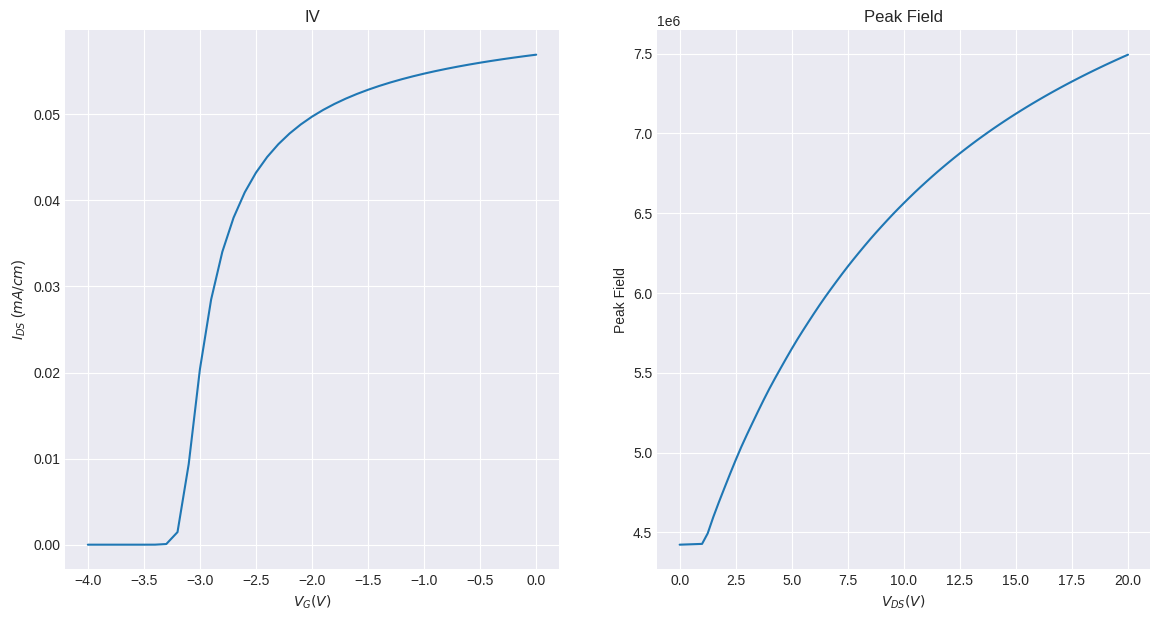

In [121]:
Gate, I_10nm, Vds, peakField_10nm = plotFromFlooxs("/home/ianstafford/flooxs/myFiles/fieldplate/IV_10nm.csv", "/home/ianstafford/flooxs/myFiles/fieldplate/peak_10nm.csv")

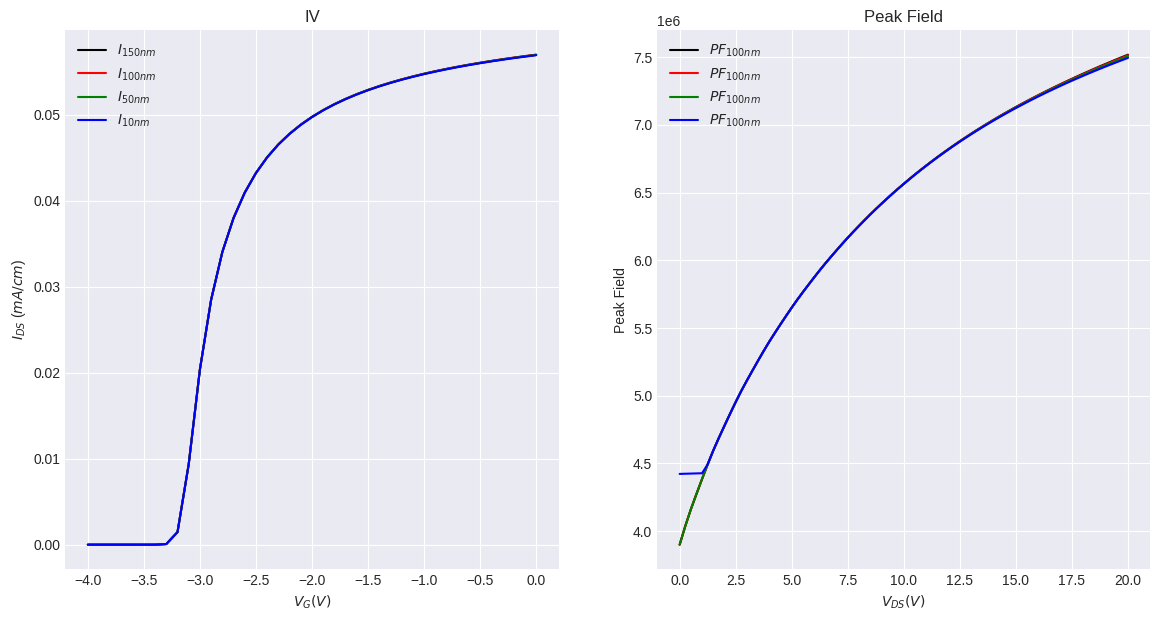

In [122]:
plt.figure(figsize=[14,7]);
plt.subplot(1,2,1);
plt.plot(Gate, I_150nm, color='black', label="$I_{150nm}$")
plt.plot(Gate, I_100nm, color='red', label="$I_{100nm}$")
plt.plot(Gate, I_50nm, color='green', label="$I_{50nm}$")
plt.plot(Gate, I_10nm, color='blue', label="$I_{10nm}$")
plt.title("IV")
plt.xlabel("$V_{G} (V)$");
plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
plt.grid(True);
plt.legend();

plt.subplot(1,2,2);
plt.plot(Vds, peakField_150nm, color='black', label="$PF_{100nm}$")
plt.plot(Vds, peakField_100nm, color='red', label="$PF_{100nm}$")
plt.plot(Vds, peakField_50nm, color='green', label="$PF_{100nm}$")
plt.plot(Vds, peakField_10nm, color='blue', label="$PF_{100nm}$")
plt.title("Peak Field")
plt.xlabel("$V_{DS} (V)$");
plt.ylabel("Peak Field");
plt.grid(True);
plt.legend();

plt.show();

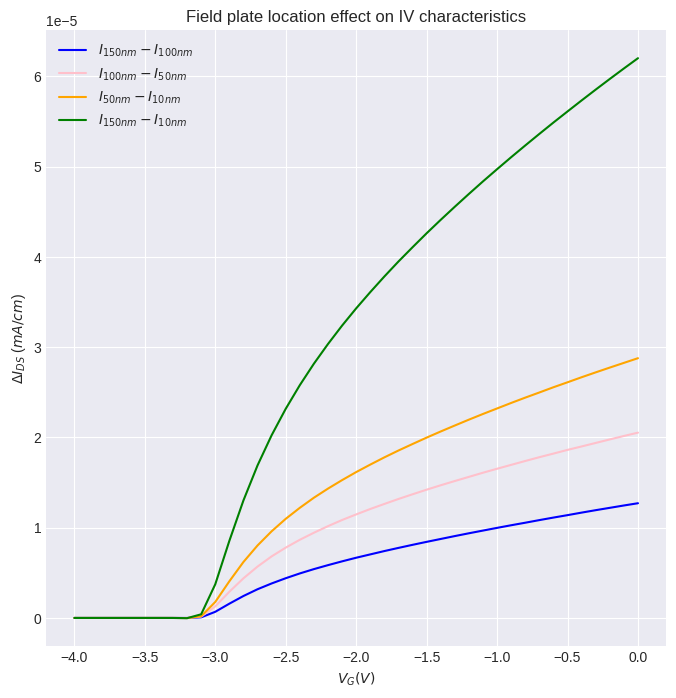

In [123]:
plt.figure(figsize=[8,8])
plt.plot(Gate, (I_150nm-I_100nm), color='blue', label='$I_{150nm}-I_{100nm}$');
plt.plot(Gate, (I_100nm-I_50nm), color='pink', label='$I_{100nm}-I_{50nm}$');
plt.plot(Gate, (I_50nm-I_10nm), color='orange', label='$I_{50nm}-I_{10nm}$');
plt.plot(Gate, (I_150nm-I_10nm), color='green', label='$I_{150nm}-I_{10nm}$');
plt.title("Field plate location effect on IV characteristics");
plt.xlabel("$V_{G} (V)$");
plt.ylabel("$ \Delta I_{DS}$ (${mA}/{cm}$)");
plt.grid(True);
plt.legend();
plt.show();

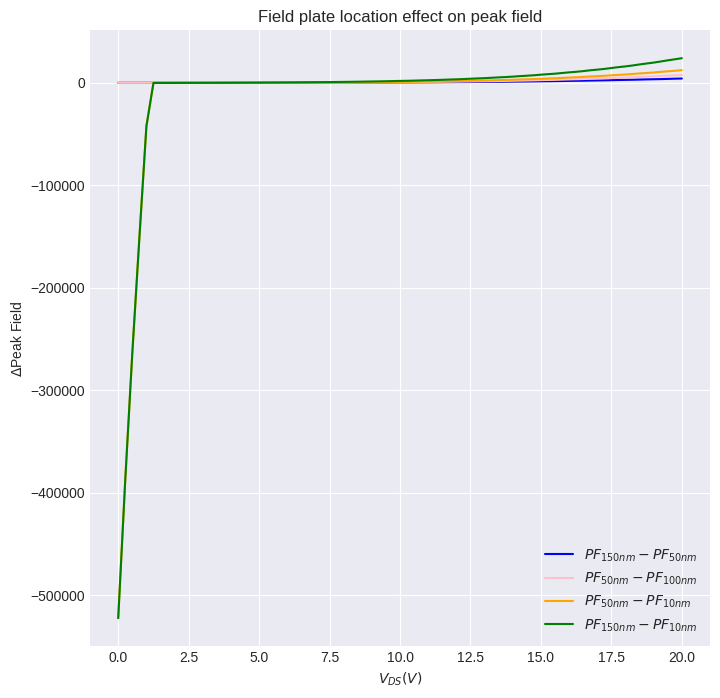

In [124]:
plt.figure(figsize=[8,8])
plt.plot(Vds, (peakField_150nm-peakField_100nm), color='blue', label='$PF_{150nm}-PF_{50nm}$')
plt.plot(Vds, (peakField_100nm-peakField_50nm), color='pink', label='$PF_{50nm}-PF_{100nm}$')
plt.plot(Vds, (peakField_50nm-peakField_10nm), color='orange', label='$PF_{50nm}-PF_{10nm}$')
plt.plot(Vds, (peakField_150nm-peakField_10nm), color='green', label='$PF_{150nm}-PF_{10nm}$')
plt.title("Field plate location effect on peak field")
plt.xlabel("$V_{DS} (V)$");
plt.ylabel("$\Delta$Peak Field ");
plt.grid(True);
plt.legend();
plt.show();

Removing any mention of the 10nm case

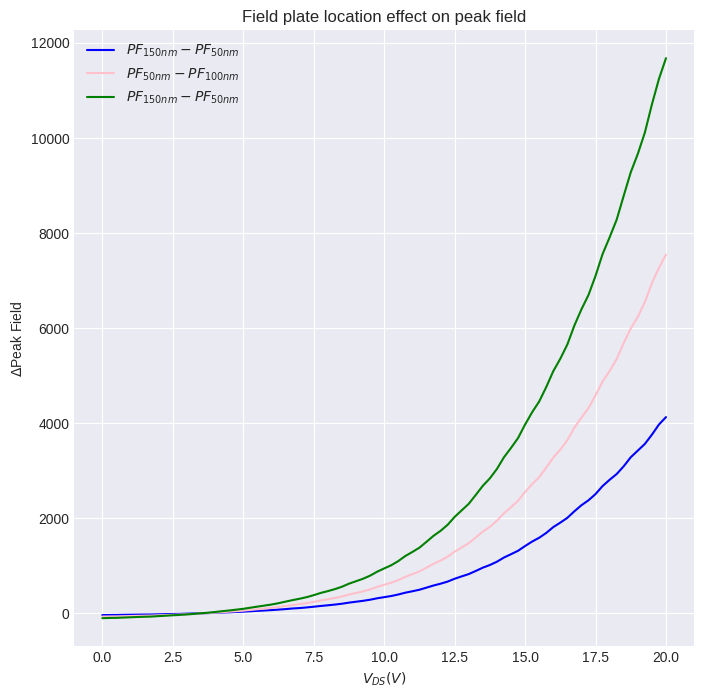

In [125]:
plt.figure(figsize=[8,8])
plt.plot(Vds, (peakField_150nm-peakField_100nm), color='blue', label='$PF_{150nm}-PF_{50nm}$')
plt.plot(Vds, (peakField_100nm-peakField_50nm), color='pink', label='$PF_{50nm}-PF_{100nm}$')
plt.plot(Vds, (peakField_150nm-peakField_50nm), color='green', label='$PF_{150nm}-PF_{50nm}$')
plt.title("Field plate location effect on peak field")
plt.xlabel("$V_{DS} (V)$");
plt.ylabel("$\Delta$Peak Field ");
plt.grid(True);
plt.legend();
plt.show();